In [1]:
import numpy as np
import pandas as pd
import re
import html
import os.path
from datetime import datetime as dt
import math

from datetime import date, timedelta

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
st_raw = pd.read_csv('C://Users//yan_m//OneDrive//Desktop//Jupyter//IND5003//Project//data//st_raw_40000_01Oct19.csv', header=0, encoding = 'unicode_escape')

In [3]:
st_raw.head(2)

,message,datetime,user
0,$AAPL $QCOM $GOOGL $NVDA TSMC counter-sues U.S...,2019-10-01T08:41:58Z,newsfilter
1,$AAPL ð® letâs go apple ð short squeeze...,2019-10-01T08:39:08Z,Newbiest


In [4]:
st = st_raw.iloc[:,0:2]

In [5]:
st.columns=['message', 'datetime']
st.head(1)

,message,datetime
0,$AAPL $QCOM $GOOGL $NVDA TSMC counter-sues U.S...,2019-10-01T08:41:58Z


Create a time-series

In [6]:
st.datetime = st.datetime.str.replace('T', ' ')
st.datetime = st.datetime.str.replace('Z', '')

st.head(2)

C:\Users\yan_m\Anaconda (Active)\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


,message,datetime
0,$AAPL $QCOM $GOOGL $NVDA TSMC counter-sues U.S...,2019-10-01 08:41:58
1,$AAPL ð® letâs go apple ð short squeeze...,2019-10-01 08:39:08


In [7]:
st['datetime'] = st['datetime'].apply(lambda x: dt.strptime(x, "%Y-%m-%d %H:%M:%S"))

C:\Users\yan_m\Anaconda (Active)\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [8]:
st.sort_values(by='datetime', ascending=False)

,message,datetime
0,$AAPL $QCOM $GOOGL $NVDA TSMC counter-sues U.S...,2019-10-01 08:41:58
1,$AAPL ð® letâs go apple ð short squeeze...,2019-10-01 08:39:08
2,"Possible low risk trading setup on $AAPL, buy ...",2019-10-01 08:38:31
3,$AAPL short squeeze today. I think we will see...,2019-10-01 08:33:18
4,https://finance.yahoo.com/news/japan-shares-ga...,2019-10-01 08:29:54
5,https://finance.yahoo.com/news/chip-stocks-pro...,2019-10-01 08:29:17
6,It&#39;s A Fine Line Between Bullish &amp; Bea...,2019-10-01 08:27:33
7,$SPY $MRK $AAPL \n\nGoooooooooooood morning fam!,2019-10-01 08:25:08
8,$AAPL - Upcoming quarterly earning report is o...,2019-10-01 08:06:04
9,$AAPL &quot;Equity analysts Kyle McNealy and G...,2019-10-01 07:55:03


In [9]:
st.set_index('datetime', inplace = True)

In [10]:
st.head(2)

,message
datetime,
2019-10-01 08:41:58,$AAPL $QCOM $GOOGL $NVDA TSMC counter-sues U.S...
2019-10-01 08:39:08,$AAPL ð® letâs go apple ð short squeeze...


Cleaning the text message

In [11]:
st['message'] = st['message'].apply(lambda x: html.unescape(x))
st['message'] = st['message'].apply(lambda x: re.sub(r'(www\.|https?://).*?(\s|$)|@.*?(\s|$)|\$.*?(\s|$)|\d|\%|\\|/|-|_', ' ', x))
st['message'] = st['message'].apply(lambda x: re.sub(r'\s+', ' ', x))

C:\Users\yan_m\Anaconda (Active)\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\yan_m\Anaconda (Active)\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\yan_m\Anaconda (Active)\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

Initialize Sentiment Analyzer

In [12]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import csv

In [13]:
nltk.download('vader_lexicon')
sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\yan_m\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [14]:
# stock market lexicon
stock_lex = pd.read_csv('C://Users//yan_m//OneDrive//Desktop//Jupyter//IND5003//Project//data//stock_lex.csv')

In [15]:
stock_lex['sentiment'] = (stock_lex['Aff_Score'] + stock_lex['Neg_Score'])/2
stock_lex = dict(zip(stock_lex.Item, stock_lex.sentiment))
stock_lex = {k:v for k,v in stock_lex.items() if len(k.split(' '))==1}

stock_lex_scaled = {}

for k, v in stock_lex.items():
    if v > 0:
        stock_lex_scaled[k] = v / max(stock_lex.values()) * 4
    else:
        stock_lex_scaled[k] = v / min(stock_lex.values()) * -4

In [16]:
# Loughran and McDonald
positive = []
with open('C://Users//yan_m//OneDrive//Desktop//Jupyter//IND5003//Project//data//lm_positive.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        positive.append(row[0].strip())
    
negative = []
with open('C://Users//yan_m//OneDrive//Desktop//Jupyter//IND5003//Project//data//lm_negative.csv', 'r') as f:
    reader = csv.reader(f)
    for row in reader:
        entry = row[0].strip().split(" ")
        if len(entry) > 1:
            negative.extend(entry)
        else:
            negative.append(entry[0])

In [17]:
final_lex = {}
final_lex.update({word:2.0 for word in positive})
final_lex.update({word:-2.0 for word in negative})
sia.lexicon = final_lex

In [18]:
final_lex = {}
final_lex.update({word:2.0 for word in positive})
final_lex.update({word:-2.0 for word in negative})
final_lex.update(stock_lex_scaled)
final_lex.update(sia.lexicon)
sia.lexicon = final_lex

Conducting the SA

In [19]:
# demonstrating how its used
text = st.message[2]
score = sia.polarity_scores(text)['compound']

print('The text:\"{0}\" has a score of {1}.'.format(text, score))

The text:"Possible low risk trading setup on buy stop entry " has a score of 0.3119.


In [20]:
# demonstrating how sia.polarity_score is used
score = sia.polarity_scores(text)
score

{'neg': 0.312, 'neu': 0.0, 'pos': 0.688, 'compound': 0.3119}

In [21]:
st['polarity_score'] = st['message'].apply(lambda x: sia.polarity_scores(x)['compound'])

C:\Users\yan_m\Anaconda (Active)\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
st.polarity_score = pd.to_numeric(st.polarity_score)

C:\Users\yan_m\Anaconda (Active)\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [23]:
st[st.polarity_score == 0].sample(3)
# notice that all the text with 0 score are gibberish, emoticons or blanks after cleaning

,message,polarity_score
datetime,,
2019-08-15 19:17:07,puts,0.0
2019-07-30 23:54:18,,0.0
2019-09-09 14:59:15,,0.0


In [24]:
st[st.polarity_score == 0].sample(3)

,message,polarity_score
datetime,,
2019-08-23 21:07:48,,0.0
2019-09-06 12:33:17,,0.0
2019-08-29 17:50:36,,0.0


In [25]:
st.drop(st[st.polarity_score == 0].index, inplace = True)
st[st.polarity_score == 0]

C:\Users\yan_m\Anaconda (Active)\lib\site-packages\pandas\core\frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,message,polarity_score
datetime,,


In [26]:
st.polarity_score.describe()

count    34875.000000
mean         0.267105
std          0.312965
min         -0.917600
25%          0.047400
50%          0.240700
75%          0.483900
max          0.993900
Name: polarity_score, dtype: float64

In [27]:
print('{0} number of comments in Stocktwits collected from ({1}) to ({2}) will be processed.'.format(len(st), st.index[0], st.index[-1]))

34875 number of comments in Stocktwits collected from (2019-10-01 08:41:58) to (2019-07-29 15:20:52) will be processed.


Aggregate them into daily

Just average of them all

In [28]:
sa_daily = st.groupby(st.index.date).polarity_score.mean()
sa_daily = pd.DataFrame(sa_daily)
sa_daily.head()

,polarity_score
2019-07-29,0.308744
2019-07-30,0.264581
2019-07-31,0.264159
2019-08-01,0.250763
2019-08-02,0.245890


In [29]:
sa = st.groupby([st.index.date, st.index.hour]).polarity_score.mean()

In [30]:
sa = pd.DataFrame(sa)
sa_hrly = sa.unstack()
sa_hrly.head(2)

polarity_score                                                   \
datetime               0         1         2         3         4        5    
2019-07-29            NaN       NaN       NaN       NaN       NaN      NaN   
2019-07-30       0.424039  0.533864  0.273753  0.208779  0.185817  0.30738   

                                                 ...                      \
datetime        6        7         8         9   ...        14        15   
2019-07-29     NaN      NaN       NaN       NaN  ...       NaN  0.242984   
2019-07-30  0.5767  0.40402  0.143027  0.383738  ...  0.244681  0.369641   

                                                                        \
datetime          16        17        18        19        20        21   
2019-07-29  0.266682  0.311448  0.290050  0.360893  0.247824  0.567545   
2019-07-30  0.375432  0.225139  0.308709  0.251702  0.229684  0.261119   

                                
datetime          22        23  
2019-07-29  0.369104  0.363050  
2019-07-30  0.322827  0.342034  

[2 rows x 24 columns]

In [31]:
SA = pd.concat([sa_daily, sa_hrly], axis=1, sort=False)
SA

,polarity_score,"(polarity_score, 0)","(polarity_score, 1)","(polarity_score, 2)","(polarity_score, 3)","(polarity_score, 4)","(polarity_score, 5)","(polarity_score, 6)","(polarity_score, 7)","(polarity_score, 8)",...,"(polarity_score, 14)","(polarity_score, 15)","(polarity_score, 16)","(polarity_score, 17)","(polarity_score, 18)","(polarity_score, 19)","(polarity_score, 20)","(polarity_score, 21)","(polarity_score, 22)","(polarity_score, 23)"
2019-07-29,0.308744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.242984,0.266682,0.311448,0.290050,0.360893,0.247824,0.567545,0.369104,0.363050
2019-07-30,0.264581,0.424039,0.533864,0.273753,0.208779,0.185817,0.307380,0.576700,0.404020,0.143027,...,0.244681,0.369641,0.375432,0.225139,0.308709,0.251702,0.229684,0.261119,0.322827,0.342034
2019-07-31,0.264159,0.284620,0.412420,0.257259,0.313078,0.323137,0.330300,0.251250,0.272500,0.198750,...,0.237176,0.237510,0.208907,0.263063,0.165255,0.260256,0.340436,0.228776,0.320731,0.316997
2019-08-01,0.250763,0.365681,0.334486,0.367672,0.263650,0.270442,0.293875,0.439120,0.105950,-0.056880,...,0.309834,0.213931,0.241812,0.208180,0.227058,0.228771,0.255838,0.269304,0.345185,0.330112
2019-08-02,0.245890,0.317523,0.294990,0.241528,0.324059,0.268277,0.256208,0.305520,0.191371,0.278133,...,0.186520,0.268421,0.226576,0.260667,0.253843,0.258143,0.212340,0.315706,0.344190,0.254372
2019-08-03,0.286292,0.252029,0.199800,0.942300,0.088000,0.416940,0.198250,0.241260,0.094400,0.771500,...,0.372400,0.225771,0.174709,0.303550,0.503230,0.316625,-0.012075,0.130600,0.060900,0.274800
2019-08-04,0.316839,0.103450,0.086800,0.353700,0.218433,0.257400,-0.128100,0.333357,0.455950,-0.100550,...,0.256829,0.285060,0.330811,0.279700,0.253758,0.523012,0.069271,0.356380,0.489660,0.471408
2019-08-05,0.241725,0.410647,0.124733,0.247751,0.189486,0.460316,0.257936,0.246725,0.111440,0.167263,...,0.209569,0.306570,0.275454,0.233712,0.225233,0.215954,0.219087,0.232317,0.233532,0.302269
2019-08-06,0.235046,0.237384,0.312220,0.308525,0.222489,0.235700,0.285812,0.252291,0.259460,0.198612,...,0.135291,0.203510,0.213638,0.208891,0.206944,0.199561,0.174964,0.362886,0.382550,0.200722
2019-08-07,0.265793,0.087521,0.268040,0.197121,0.223533,0.370800,0.301337,0.107967,0.522400,0.120460,...,0.299185,0.284204,0.282085,0.266836,0.249378,0.224775,0.272224,0.244586,0.442176,0.299415


In [32]:
num_str = str(list(range(24)))

In [ ]:
SA.to_csv('C://Users//yan_m//OneDrive//Desktop//Jupyter//IND5003//Project//data//Sentiment_Scores_01Oct19_v2.csv', index=True)

In [ ]:
SA.iloc[1:, 1:]

In [34]:
import yfinance as yf
apple = yf.download('AAPL','2019-07-31', '2019-10-05')

[*********************100%***********************]  1 of 1 downloaded


C:\Users\yan_m\Anaconda (Active)\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Correlation (2019-07-29 to 2019-10-01)')

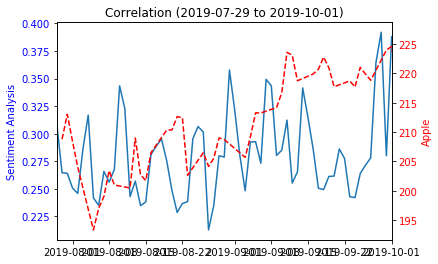

In [35]:
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.plot(SA.index, SA.polarity_score)
ax1.set_ylabel('Sentiment Analysis', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')
    
ax2 = ax1.twinx()

ax2.plot(apple.index, apple.Close, 'r--')
ax2.set_ylabel('Apple', color='r')
for tl in ax2.get_yticklabels():
    tl.set_color('r')
    
plt.xlim(SA.index[0], SA.index[-1])
plt.title('Correlation ({0} to {1})'.format(SA.index[0], SA.index[-1]))